## Caracterização meteorológica da área de estudo

Autor: Mayara Dargas Sousa

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

Meteorologia de superfície
Meteorologia upperair ou sondagem/perfil da atmosfera
Superfície - Albedo, razão de Bowen e Rugosidade

## Obtenção de dados 

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados foram coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR e referem-se ao período de 01/01/2023 a 01/01/2024 no munícipio de Florinaópolis.
Foi optada por esta estação pois é a mais próxima do munícipio de interesse, Criciúma, onde esta localizada a fábrica da Eliane Revetsimento. Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

### Parte 01

1 - Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

## Meteorologia de superfície

### Série temporal bruta

C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSuperficie
['metar_2023.csv']
      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0 

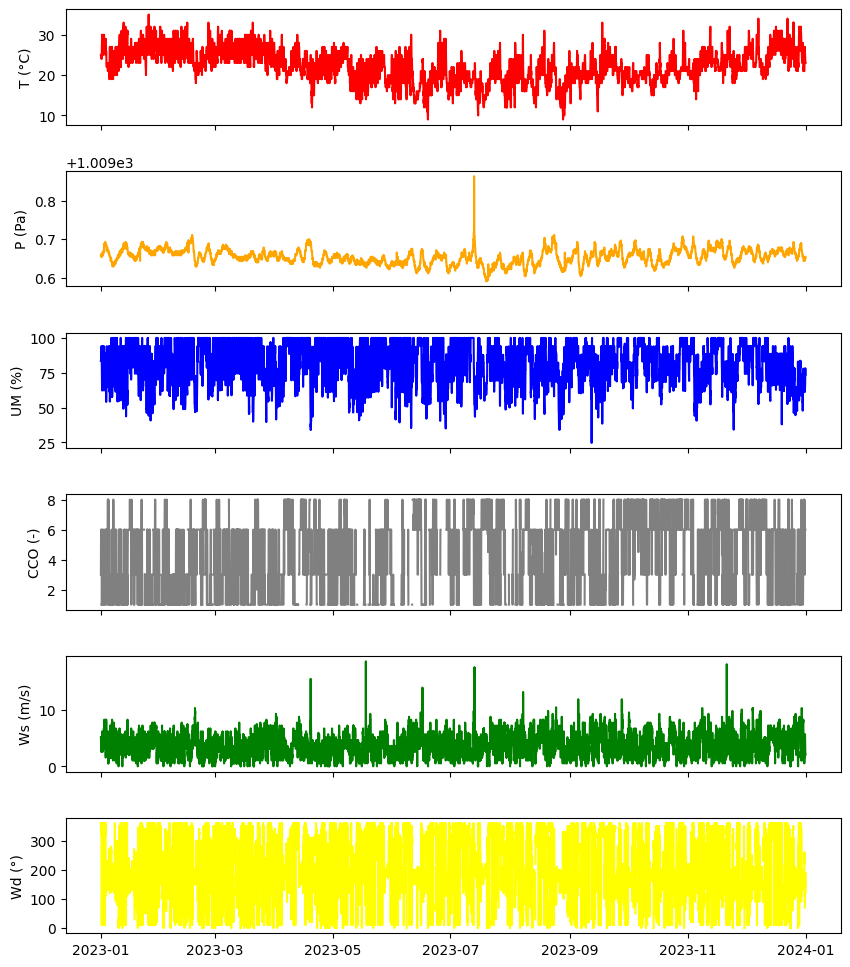

In [132]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red')
ax[0].set_ylabel('T (°C)')

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange')
ax[1].set_ylabel('P (Pa)')

# Gráfico 3: Umidade relativa do ar em % (blue)
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='blue')
ax[2].set_ylabel('UM (%)')

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray')
ax[3].set_ylabel('CCO (-)')

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='green')
ax[4].set_ylabel('Ws (m/s)')

# Gráfico 6: Wd (°) (yellow)
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='yellow')
ax[5].set_ylabel('Wd (°)')


# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4)

plt.show()



## Série temporal sem outliers 

C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSuperficie
['metar_2023.csv']
0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]
      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...  

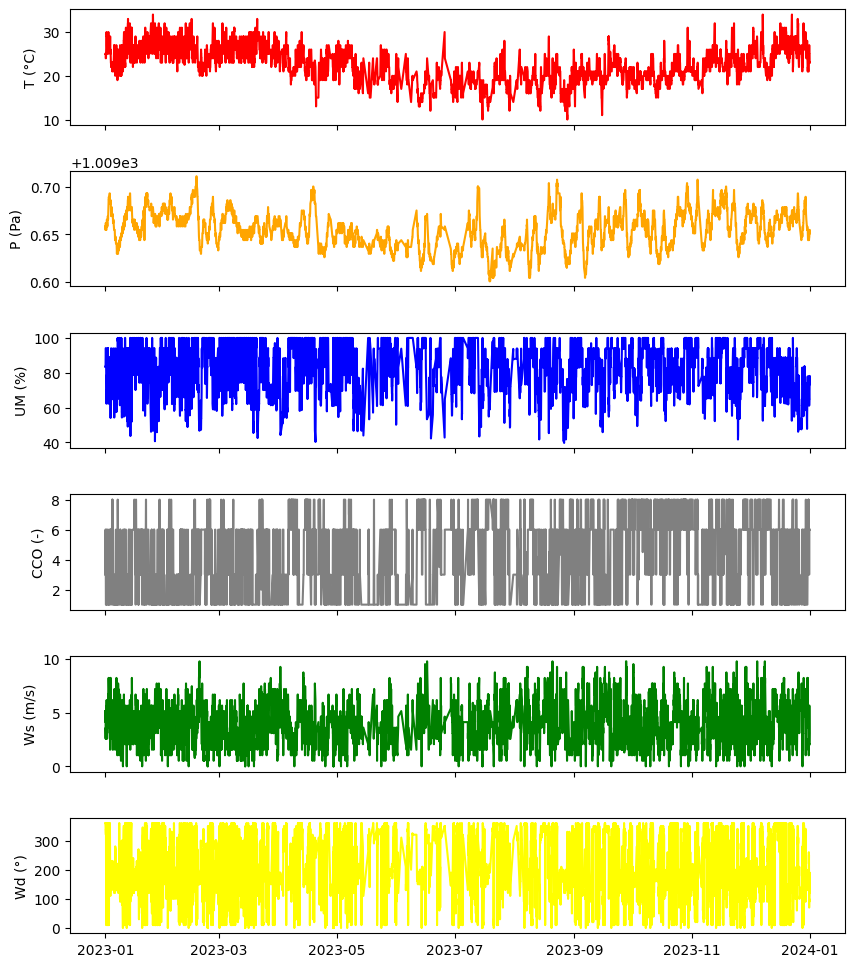

In [133]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs', 'meteoSuperficie')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(os.path.join(metSuperficiePath, file)))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)


# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

print(metSuperficie['datetime'])


# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])
print(metSuperficie)
print(type(metSuperficie))

# Função para remover outliers usando o método do desvio padrão
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    return df_filtered

# Removendo outliers de cada coluna relevante
columns_to_check = ['temp', 'p', 'relh', 'cco', 'ws', 'wd']
for col in columns_to_check:
    metSuperficie = remove_outliers(metSuperficie, col)

# Convertendo a coluna 'datetime' para o tipo datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'])

# Plotando os gráficos
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red')
ax[0].set_ylabel('T (°C)')

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange')
ax[1].set_ylabel('P (Pa)')

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='blue')
ax[2].set_ylabel('UM (%)')

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray')
ax[3].set_ylabel('CCO (-)')

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='green')
ax[4].set_ylabel('Ws (m/s)')

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='yellow')
ax[5].set_ylabel('Wd (°)')

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4)

plt.show()


O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da Um é:100.0
O percentil 99 da cco é:8.0
O percentil 99 da Ws é:8.231104
O percentil 99 da Wd é:360.0


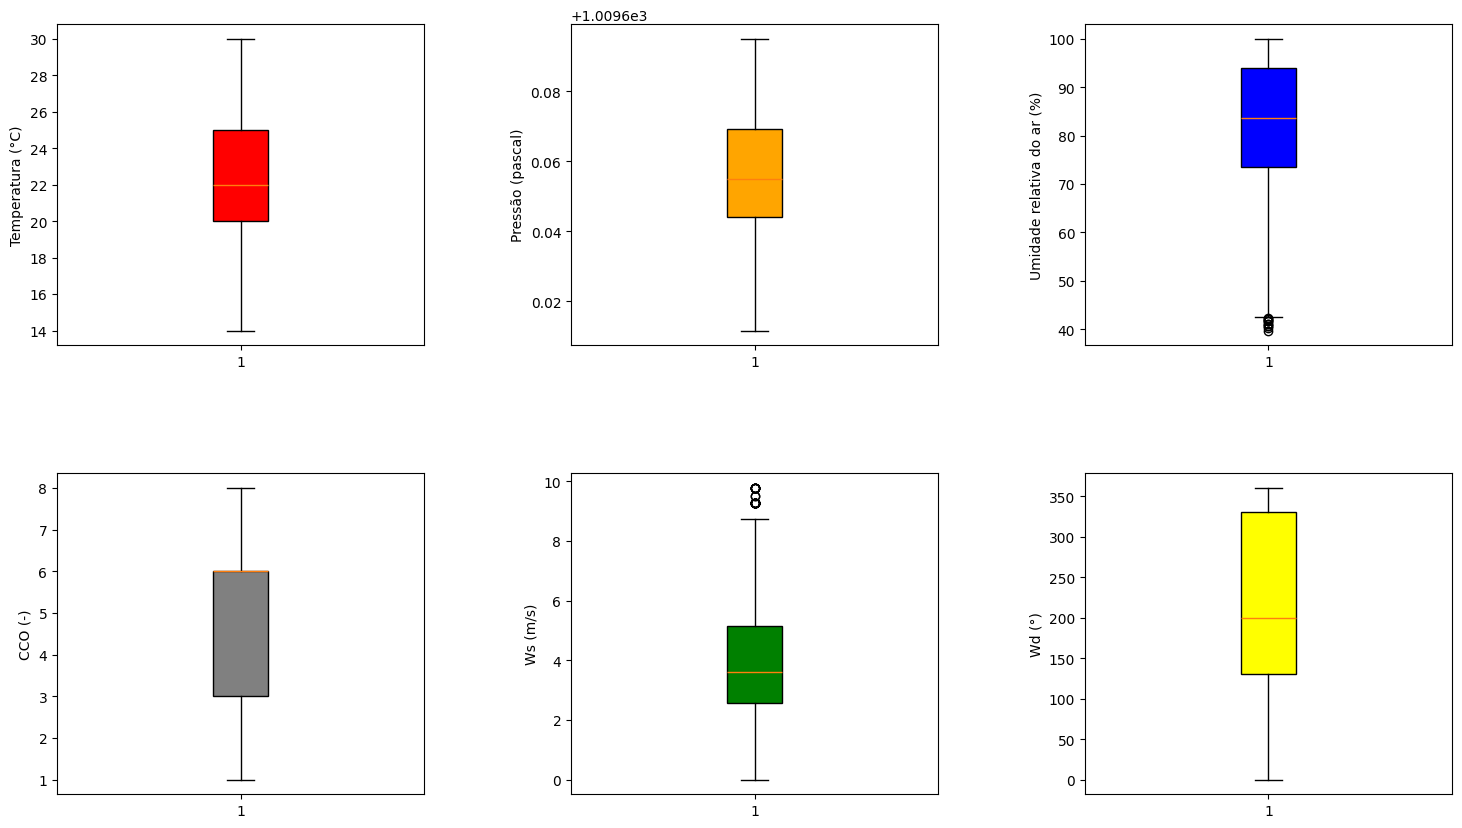

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando os percentis 99 para as variáveis
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é:' + str(p99))
Um99 = np.percentile(metSuperficie['relh'], 99)
print('O percentil 99 da Um é:' + str(Um99))
cco99 = np.nanpercentile(metSuperficie['cco'], 99)
print('O percentil 99 da cco é:' + str(cco99))
Ws99 = np.nanpercentile(metSuperficie['ws'], 99)
print('O percentil 99 da Ws é:' + str(Ws99))
Wd99 = np.nanpercentile(metSuperficie['wd'], 99)
print('O percentil 99 da Wd é:' + str(Wd99))

# Criando a figura com 6 subgráficos em uma grade 2x3
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Boxplot da temperatura
bp_temp = ax[0, 0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) &
                                                 (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))],
                           patch_artist=True)
for patch in bp_temp['boxes']:
    patch.set_facecolor('red')
ax[0, 0].set_ylabel('Temperatura (°C)')

# Boxplot da pressão
bp_p = ax[0, 1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) &
                                           (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))],
                        patch_artist=True)
for patch in bp_p['boxes']:
    patch.set_facecolor('orange')
ax[0, 1].set_ylabel('Pressão (pascal)')

# Boxplot da umidade relativa do ar
bp_relh = ax[0, 2].boxplot(metSuperficie['relh'], patch_artist=True)
for patch in bp_relh['boxes']:
    patch.set_facecolor('blue')
ax[0, 2].set_ylabel('Umidade relativa do ar (%)')

# Boxplot da CCO
bp_cco = ax[1, 0].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])], patch_artist=True)
for patch in bp_cco['boxes']:
    patch.set_facecolor('gray')
ax[1, 0].set_ylabel('CCO (-)')

# Boxplot da Ws
bp_ws = ax[1, 1].boxplot(metSuperficie['ws'][~np.isnan(metSuperficie['ws'])], patch_artist=True)
for patch in bp_ws['boxes']:
    patch.set_facecolor('green')
ax[1, 1].set_ylabel('Ws (m/s)')

# Boxplot da Wd
bp_wd = ax[1, 2].boxplot(metSuperficie['wd'][~np.isnan(metSuperficie['wd'])], patch_artist=True)
for patch in bp_wd['boxes']:
    patch.set_facecolor('yellow')
ax[1, 2].set_ylabel('Wd (°)')

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Exibindo a figura
plt.show()


    datetime       temp           p       relh       cco        ws          wd
0 2022-01-01  13.741538  370.275118  84.062846  2.196660  0.053736  185.049848
1 2022-01-02  14.539921  668.635005  50.723469  7.016211  2.445692  104.348185
2 2022-01-03  22.808276  985.530385  65.182182  3.578163  1.678279  176.389042
3 2022-01-04   6.496114  680.721241  90.630809  9.345518  4.994606  342.332682
4 2022-01-05   1.209466  212.785324  96.065045  5.652762  4.066985  251.806248


C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\3348047561.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\3348047561.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\3348047561.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


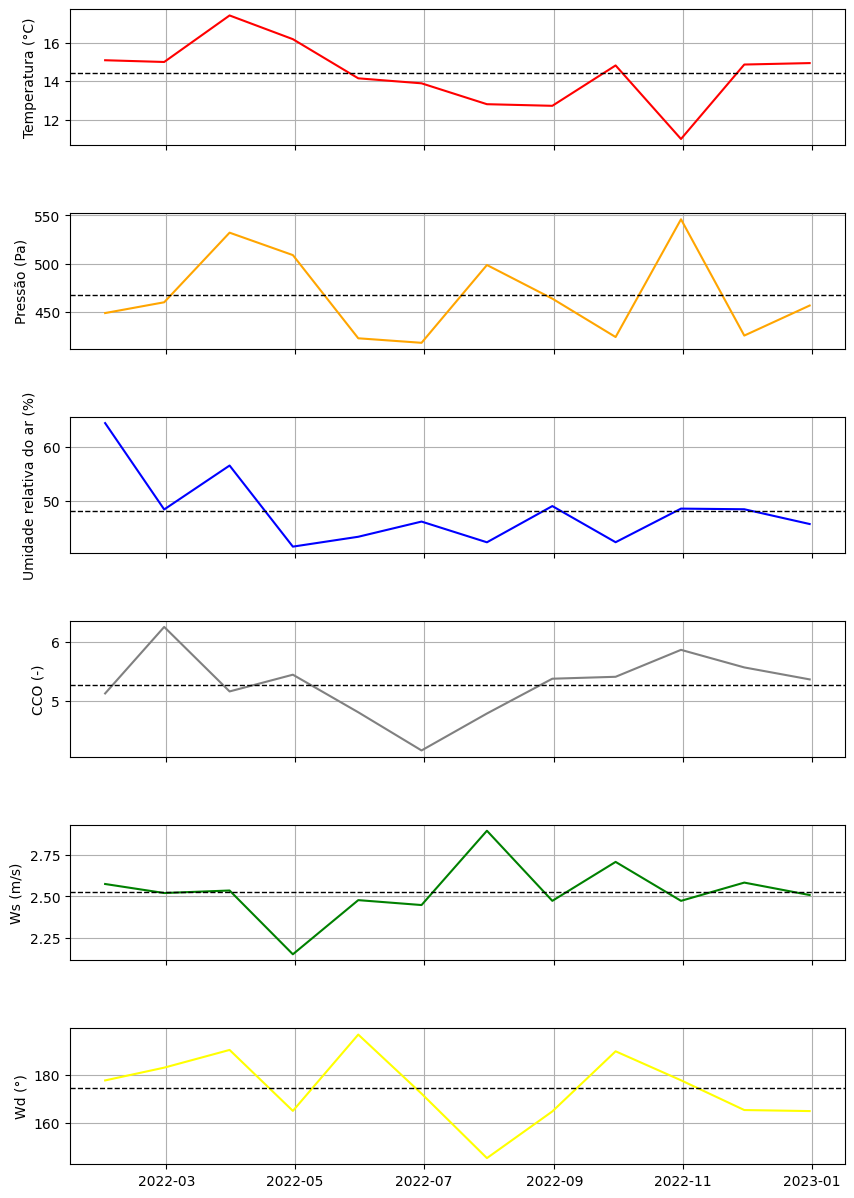

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de estrutura de DataFrame
#data = {
    #'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
   # 'temp': np.random.rand(365) * 30,
 #   'p': np.random.rand(365) * 1000,
 #   'relh': np.random.rand(365) * 100,
 #   'cco': np.random.rand(365) * 10,
 #   'ws': np.random.rand(365) * 5,
 #   'wd': np.random.rand(365) * 360
#}

metSuperficie = pd.DataFrame(data)

# Verificando o DataFrame
print(metSuperficie.head())

# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Função para adicionar uma linha média tracejada
def add_mean_line(axis, mean_value, color='black'):
    axis.axhline(y=mean_value, color=color, linestyle='--', linewidth= 1)

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 15))

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red')
ax[0].set_ylabel('Temperatura (°C)')
add_mean_line(ax[0], media_mensal['temp'].mean(), color='black')
ax[0].grid(True)  # Adiciona grades ao gráfico
#ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2)  # Sombra

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange')
ax[1].set_ylabel('Pressão (Pa)')
add_mean_line(ax[1], media_mensal['p'].mean(), color='black')
ax[1].grid(True)  # Adiciona grades ao gráfico

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue')
ax[2].set_ylabel('Umidade relativa do ar (%)')
add_mean_line(ax[2], media_mensal['relh'].mean(), color='black')
ax[2].grid(True)  # Adiciona grades ao gráfico

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray')
ax[3].set_ylabel('CCO (-)')
add_mean_line(ax[3], media_mensal['cco'].mean(), color='black')
ax[3].grid(True)  # Adiciona grades ao gráfico

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(media_mensal.index, media_mensal['ws'], color='green')
ax[4].set_ylabel('Ws (m/s)')
add_mean_line(ax[4], media_mensal['ws'].mean(), color='black')
ax[4].grid(True)  # Adiciona grades ao gráfico

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(media_mensal.index, media_mensal['wd'], color='yellow')
ax[5].set_ylabel('Wd (°)')
add_mean_line(ax[5], media_mensal['wd'].mean(), color='black')
ax[5].grid(True)  # Adiciona grades ao gráfico

# Ajustando o espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


    datetime       temp           p       relh       cco        ws          wd
0 2022-01-01  18.480287   12.270056  26.853654  1.280229  1.862847  129.847522
1 2022-01-02  17.496589   84.529755  75.869441  4.648586  0.613083  123.229987
2 2022-01-03  10.696217  781.524647  68.563133  3.964111  3.043500  204.637443
3 2022-01-04   3.582732   94.435931  85.648661  6.903458  4.970611  285.165566
4 2022-01-05  28.929397  768.377109  46.602548  0.222009  2.092635  136.699291


C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\1917028029.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\1917028029.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\mayar\AppData\Local\Temp\ipykernel_28844\1917028029.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


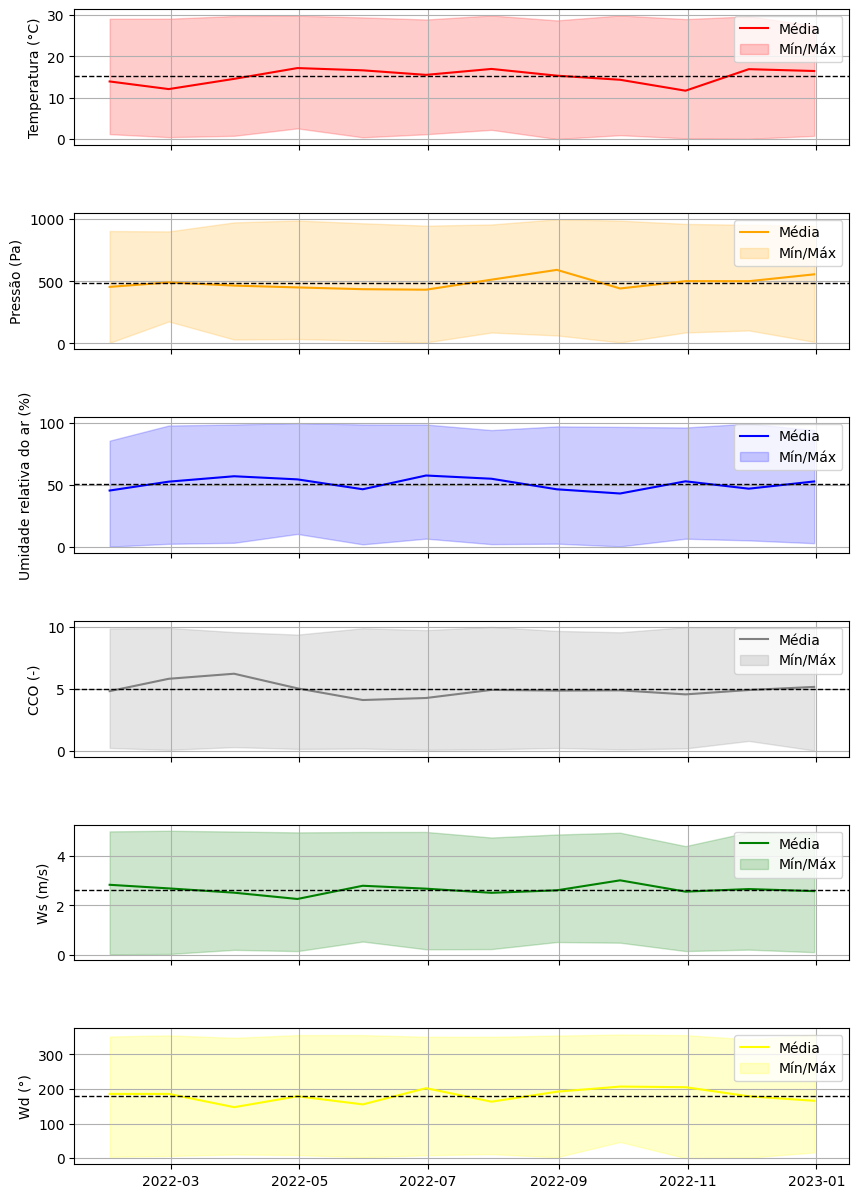

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de estrutura de DataFrame
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'temp': np.random.rand(365) * 30,
    'p': np.random.rand(365) * 1000,
    'relh': np.random.rand(365) * 100,
    'cco': np.random.rand(365) * 10,
    'ws': np.random.rand(365) * 5,
    'wd': np.random.rand(365) * 360
}

metSuperficie = pd.DataFrame(data)

# Verificando o DataFrame
print(metSuperficie.head())

# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Função para adicionar uma linha média tracejada
def add_mean_line(axis, mean_value, color='black'):
    axis.axhline(y=mean_value, color=color, linestyle='--', linewidth=1)

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 15))

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Mín/Máx')
ax[0].set_ylabel('Temperatura (°C)')
add_mean_line(ax[0], media_mensal['temp'].mean(), color='black')
ax[0].grid(True)
ax[0].legend()

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Mín/Máx')
ax[1].set_ylabel('Pressão (Pa)')
add_mean_line(ax[1], media_mensal['p'].mean(), color='black')
ax[1].grid(True)
ax[1].legend()

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2, label='Mín/Máx')
ax[2].set_ylabel('Umidade relativa do ar (%)')
add_mean_line(ax[2], media_mensal['relh'].mean(), color='black')
ax[2].grid(True)
ax[2].legend()

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Mín/Máx')
ax[3].set_ylabel('CCO (-)')
add_mean_line(ax[3], media_mensal['cco'].mean(), color='black')
ax[3].grid(True)
ax[3].legend()

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(media_mensal.index, media_mensal['ws'], color='green', label='Média')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='green', alpha=0.2, label='Mín/Máx')
ax[4].set_ylabel('Ws (m/s)')
add_mean_line(ax[4], media_mensal['ws'].mean(), color='black')
ax[4].grid(True)
ax[4].legend()

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(media_mensal.index, media_mensal['wd'], color='yellow', label='Média')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='yellow', alpha=0.2, label='Mín/Máx')
ax[5].set_ylabel('Wd (°)')
add_mean_line(ax[5], media_mensal['wd'].mean(), color='black')
ax[5].grid(True)
ax[5].legend()

# Ajustando o espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


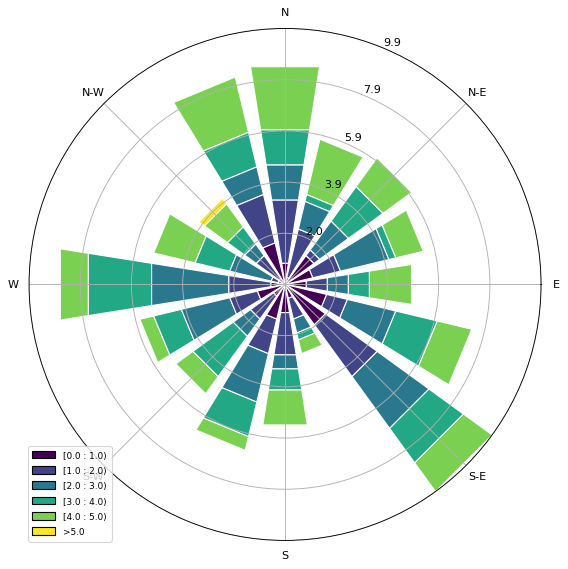

In [139]:
# Criando minha rosa dos ventos
!pip install windrose

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Discussão dos relfexos das condições metereológicas na qualidade do ar

## Parte 02

2 - Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

meia noite e 12h em 10 dias, 5 de inverno e 5 de verão, ou seja: 20 gráficos 

# Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [141]:
from datetime import datetime

!pip install siphon

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2023, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

#esumindo, essa função extrai dados de radiossondagem de uma estação meteorológica específica em uma determinada data e hora e os armazena em um DataFrame para análise posterior

    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1015.0       5         25.8      18.8      330.0    5.0   2.500000   
1     1004.0      97         23.4      18.4      341.0    6.0   1.953409   
2     1000.0     131         23.2      17.2      345.0    7.0   1.811733   
3      925.0     808         18.2      14.0      335.0   11.0   4.648801   
4      884.0    1195         15.4      14.0      347.0   13.0   2.924364   
..       ...     ...          ...       ...        ...    ...        ...   
83      40.0   22046        -60.6     -89.0       85.0   12.0 -11.954336   
84      39.0   22203        -60.3     -88.9      110.0   18.0 -16.914467   
85      37.0   22531        -59.5     -88.6      100.0   24.0 -23.635386   
86      35.0   22877        -58.7     -88.2       75.0   22.0 -21.250368   
87      33.0   23243        -57.9     -87.9        NaN    NaN        NaN   

       v_wind station  station_number                time  latitude  \
0   -4.330127   

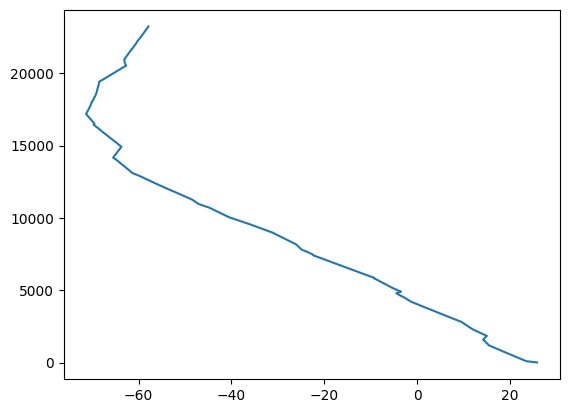

In [142]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

[-2.60869565 -0.58823529 -0.73855244 -0.72351421 -0.28301887 -0.30837004
 -0.4         0.26490066  0.3539823  -0.67567568 -0.47979798 -0.43859649
 -0.70175439 -0.79734219 -0.77216397 -0.50724638 -0.55555556 -0.64814815
 -0.53333333  0.89285714 -0.71428571 -0.70247934 -0.59097978  0.
 -0.84795322 -0.83928571 -0.84033613 -0.86419753 -0.36697248 -0.69767442
 -0.76923077 -0.32520325 -0.62794349 -0.6185567  -0.90909091 -0.84388186
 -0.9252669  -0.92783505 -0.63872255 -0.65217391 -1.         -0.86956522
 -0.4620462  -0.70993915 -0.66561014 -0.76190476 -0.37735849 -0.37959668
 -0.48780488  0.23968043 -0.38461538 -0.40055249 -0.35714286 -0.40114613
  0.33898305 -0.25       -0.26666667 -0.29239766  0.          0.1686747
  0.13793103  0.13289037  0.25641026  0.12578616  0.18404908  0.11976048
  0.08275862  0.          0.53571429  0.47169811  0.56074766  0.5
  0.52631579  0.52173913  0.56603774  0.         -0.16393443 -0.08064516
 -0.06024096  0.2173913   0.2195122   0.24137931  0.23026316  0.191

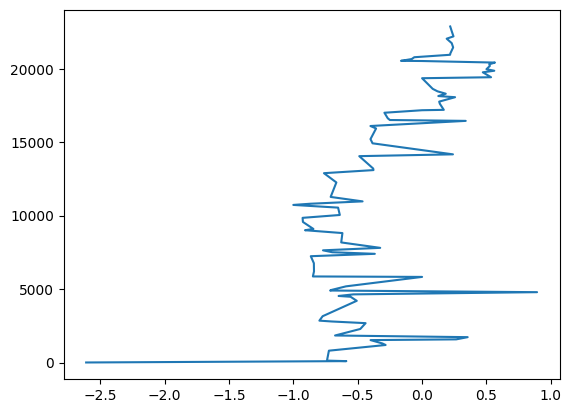

In [143]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

In [151]:
import random
from datetime import datetime, timedelta

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Definindo os períodos das estações do ano
summer_start = datetime(2023, 1, 1)
summer_end = datetime(2023, 3, 20)
winter_start = datetime(2023, 6, 15)
winter_end = datetime(2023, 9, 22)

# Listas para armazenar as datas
summer_dates = []
winter_dates = []

# Gerando 5 datas aleatórias no verão
for _ in range(5):
    random_date = random_date_in_season(summer_start, summer_end)
    summer_dates.append(random_date)

# Gerando 5 datas aleatórias no inverno
for _ in range(5):
    random_date = random_date_in_season(winter_start, winter_end)
    winter_dates.append(random_date)

# Função para gerar uma data aleatória em uma estação do ano
def random_date_in_season(season_start, season_end):
    days_in_season = (season_end - season_start).days
    random_days = random.randint(0, days_in_season)
    random_date = season_start + timedelta(days=random_days)
    # Define a hora como 12 horas ou meia-noite aleatoriamente
    random_date = random_date.replace(hour=random.choice([0, 12]))
    return random_date

# Extraindo dados para datas de verão
for date in summer_dates:
    df = WyomingUpperAir.request_data(date, station)
    print(df)

# Extraindo dados para datas de inverno
for date in winter_dates:
    df = WyomingUpperAir.request_data(date, station)
    print(df)


    pressure   height  temperature  dewpoint  direction  speed        u_wind  \
0     1016.0      5.0         20.8      12.8        180     12 -1.469576e-15   
1     1000.0    145.0         19.2      10.2        195     15  3.882286e+00   
2      925.0    809.0         13.8       8.8        175     26 -2.266049e+00   
3      898.0   1058.0         12.4      10.1        189     21  3.285124e+00   
4      886.0   1172.0         15.6      10.6        195     18  4.658743e+00   
..       ...      ...          ...       ...        ...    ...           ...   
73      20.0  26400.0        -50.3     -84.3         85     41 -4.084398e+01   
74      19.3  26633.0        -48.5     -83.5         88     43 -4.297381e+01   
75      18.0  27094.0        -47.7     -83.1         95     48 -4.781735e+01   
76      16.3  27749.0        -46.5     -82.5         82     45 -4.456206e+01   
77      16.0      NaN          NaN       NaN         80     44 -4.333154e+01   

       v_wind station  station_number  

In [1]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Definindo o local da análise
station = 'SBFL'

# Função para gerar uma data aleatória em uma estação do ano
def random_date_in_season(season_start, season_end):
    days_in_season = (season_end - season_start).days
    random_days = random.randint(0, days_in_season)
    random_date = season_start + timedelta(days=random_days)
    # Define a hora como 12 horas ou meia-noite aleatoriamente
    random_date = random_date.replace(hour=random.choice([0, 12]))
    return random_date


# Definindo os períodos das estações do ano
summer_start = datetime(2023, 1, 1)
summer_end = datetime(2023, 3, 20)
winter_start = datetime(2023, 6, 15)
winter_end = datetime(2023, 9, 20)

# Listas para armazenar as datas
summer_dates = []
winter_dates = []

# Gerando 5 datas aleatórias no verão
for _ in range(5):
    random_date = random_date_in_season(summer_start, summer_end)
    summer_dates.append(random_date)

# Gerando 5 datas aleatórias no inverno
for _ in range(5):
    random_date = random_date_in_season(winter_start, winter_end)
    winter_dates.append(random_date)

# Extraindo e plotando os dados para datas de verão
for i, date in enumerate(summer_dates):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Criando o subplot
    plt.subplot(5, 2, i+1)
    
    # Plotando o perfil de temperatura
    plt.plot(df['temperature'], df['height'])
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(f'Dia {date.day}/{date.month} - Verão - {date.hour}:00')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Extraindo e plotando os dados para datas de inverno
for i, date in enumerate(winter_dates):
    # Extraindo os dados
    df = WyomingUpperAir.request_data(date, station)
    
    # Criando o subplot
    plt.subplot(5, 2, i+6)
    
    # Plotando o perfil de temperatura
    plt.plot(df['temperature'], df['height'])
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(f'Dia {date.day}/{date.month} - Inverno - {date.hour}:00')
    plt.grid(True)

plt.tight_layout()
plt.show()


ValueError: No data available for 2023-01-29 00Z for station SBFL.

# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

In [ ]:
# Instalar o módulo netCDF4
!pip install netCDF4

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis. 

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

plt.show()


16- Vocês precisam analisar o arquivo METEO.SFC. A página 83 (ou 2-54) do user guide do AERMET detalha cada coluna deste arquivo: https://www.epa.gov/sites/default/files/2020-09/documents/aermet_userguide.pdf. Abra este arquivo no libreoffice ou excel e converta para .csv. substitua o cabeçalho para facilitar sua vida. 
17 - Abra no python para analisar as variáveis desta atividade. 

1-5 ano (2 dígitos), mês, dia, dia juliano e hora
6 fluxo de calor sensível (W/m2)
7 velocidade de fricção da superfície (m/s)
8 escala de velocidade convectiva (definida como -9.0 para atmosfera estável) (m/s)
9 gradiente de temperatura potencial acima da altura de mistura (K/m)
10 altura de mistura impulsionada por convecção (definida como -999. para atmosfera estável) (m)
11 altura de mistura impulsionada mecanicamente (calculada para todas as horas) (m)
12 comprimento de Monin-Obukhov (m)
13 comprimento de rugosidade da superfície (dependente do mês e direção do vento) (m)
14 razão de Bowen (dependente do mês e direção do vento) (adimensional)
15 albedo (dependente do mês e direção do vento; 1.0 para horas antes do nascer do sol ou após o pôr do sol) (adimensional)
16-18 velocidade do vento, direção do vento e altura do anemômetro usados nos cálculos na Etapa 3 (m/s, graus, m)
19-20 temperatura e altura de medição usadas nos cálculos na Etapa 3 (K e m)
21 código de tipo de precipitação
22 quantidade de precipitação (mm/hr)
23 umidade relativa (%)
24 pressão atmosférica da estação (mb)
25 cobertura de nuvens (décimos)
26 ajuste de velocidade do vento e sinalizador da fonte de dados
27 cobertura de nuvens e substituição de temperatura por interpolação








 # EZ-AERMET

In [13]:
# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
meteoSFC = rootPath +'\\inputs\\meteoSFC'
print(meteoSFC)

# Listando os arquivos dentro do diretório
files = os.listdir(meteoSFC)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSFC=[]
for file in files:
    metSFC.append(pd.read_csv(meteoSFC+'\\'+file))

# Convertendo metSFC para DataFrame
metSFC = pd.concat(metSFC)

print(metSFC)
print(type(metSFC))

C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSFC
['meteo.sfc.csv']
      ano  mes  dia   dia juliano  hora  FCS (W/m2)   VFS   EVC (m/s)  \
0      23    1     1            1     1       -34.5  0.395       -9.0   
1      23    1     1            1     2       -32.2  0.368       -9.0   
2      23    1     1            1     3       -37.2  0.425       -9.0   
3      23    1     1            1     4       -42.0  0.480       -9.0   
4      23    1     1            1     5       -12.5  0.142       -9.0   
...   ...  ...   ...          ...   ...         ...    ...        ...   
8757   23   12    31          365    22        -9.2  0.121       -9.0   
8758   23   12    31          365    23      -999.0 -9.000       -9.0   
8759   23   12    31          365    24      -999.0 -9.000       -9.0   
8760   23   12    31          365    24      -999.0 -9.000       -9.0   
8761   24    1     1            1     1       -34